## Example plotting following [ASP Docs Section 8.4](https://stereopipeline.readthedocs.io/en/latest/examples/moc.html#mars-global-surveyor-moc-na) for Mars Orbital Camera (MOC) Narrow Angle (NA)

Below are example `asp_plot` outputs following the processing in ASP Docs Mars MOC example [Section 8.4](https://stereopipeline.readthedocs.io/en/latest/examples/moc.html#mars-global-surveyor-moc-na).

Retrieve `.imq` files:

```bash
wget -O M0806047.imq \
   https://planetarydata.jpl.nasa.gov/img/data/mgs-m-moc-na_wa-2-sdp-l0-v1.0/mgsc_1068/m08060/m0806047.imq

wget -O R0701361.imq \
   https://planetarydata.jpl.nasa.gov/img/data/mgs-m-moc-na_wa-2-sdp-l0-v1.0/mgsc_1270/r07013/r0701361.imq
```

---

[Install ISIS](https://astrogeology.usgs.gov/docs/how-to-guides/environment-setup-and-maintenance/installing-isis-via-anaconda/#installing-isis) and pre-process the images for stereo:

```bash
ISIS> moc2isis f=M0806047.imq t=M0806047.cub
ISIS> moc2isis f=R0701361.imq t=R0701361.cub
ISIS> spiceinit from=M0806047.cub
ISIS> spiceinit from=R0701361.cub
ISIS> cam2map4stereo.py M0806047.cub R0701361.cub
```

---

Run stereo processing and point2dem:

```bash
parallel_stereo M0806047.map.cub R0701361.map.cub result/output

point2dem -r mars --stereographic --auto-proj-center result/output-PC.tif --errorimage result/output-PC.tif
```

## Full report

Example command for full stereo-processing report

In [1]:
directory = "/Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_4_mars_MOC_NA/"
stereo_directory = "result/"

In [3]:
!asp_plot \
  --directory $directory \
  --stereo_directory $stereo_directory \
  --subset_km 1 \
  --add_basemap False \
  --plot_icesat False \
  --plot_geometry False


Processing ASP files in /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_4_mars_MOC_NA/


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_4_mars_MOC_NA/result/output-DEM.tif


Using map projection from DEM: EPSG:None


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_4_mars_MOC_NA/result/output-DEM.tif

Figure saved to /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_4_mars_MOC_NA/tmp_asp_report_plots/00.png
Plotting DEM results. This can take a minute for large inputs.
Figure saved to /Users/ben/Dropbox/UW_Shean/asp_p

## Individual plots

Example modular usage of `asp_plot` for this example processing.

### Processing Parameters

In [4]:
%load_ext autoreload
%autoreload 2

from asp_plot.processing_parameters import ProcessingParameters

In [5]:
processing_parameters = ProcessingParameters(
    processing_directory=directory,
    stereo_directory=stereo_directory
)
processing_parameters_dict = processing_parameters.from_log_files()

print(f"Processed on: {processing_parameters_dict['processing_timestamp']}\n")

print(f"Reference DEM: {processing_parameters_dict['reference_dem']}\n")

print(f"Bundle adjustment ({processing_parameters_dict['bundle_adjust_run_time']}):\n")
print(processing_parameters_dict["bundle_adjust"])

print(f"\nStereo ({processing_parameters_dict['stereo_run_time']}):\n")
print(processing_parameters_dict["stereo"])

print(f"\nPoint2dem ({processing_parameters_dict['point2dem_run_time']}):\n")
print(processing_parameters_dict["point2dem"])

Processed on: 2025-10-31 11:54:20

Reference DEM: 

Bundle adjustment (N/A):

Bundle adjustment not run

Stereo (0 hours and 2 minutes):

stereo M0806047.map.cub R0701361.map.cub result/output --corr-seed-mode 1 --sgm-collar-size 0 --compute-point-cloud-center-only --threads 8

Point2dem (0 hours and 0 minutes):

point2dem -r mars --stereographic --auto-proj-center result/output-PC.tif --errorimage result/output-PC.tif


### Scene Plots

In [6]:
from asp_plot.scenes import ScenePlotter

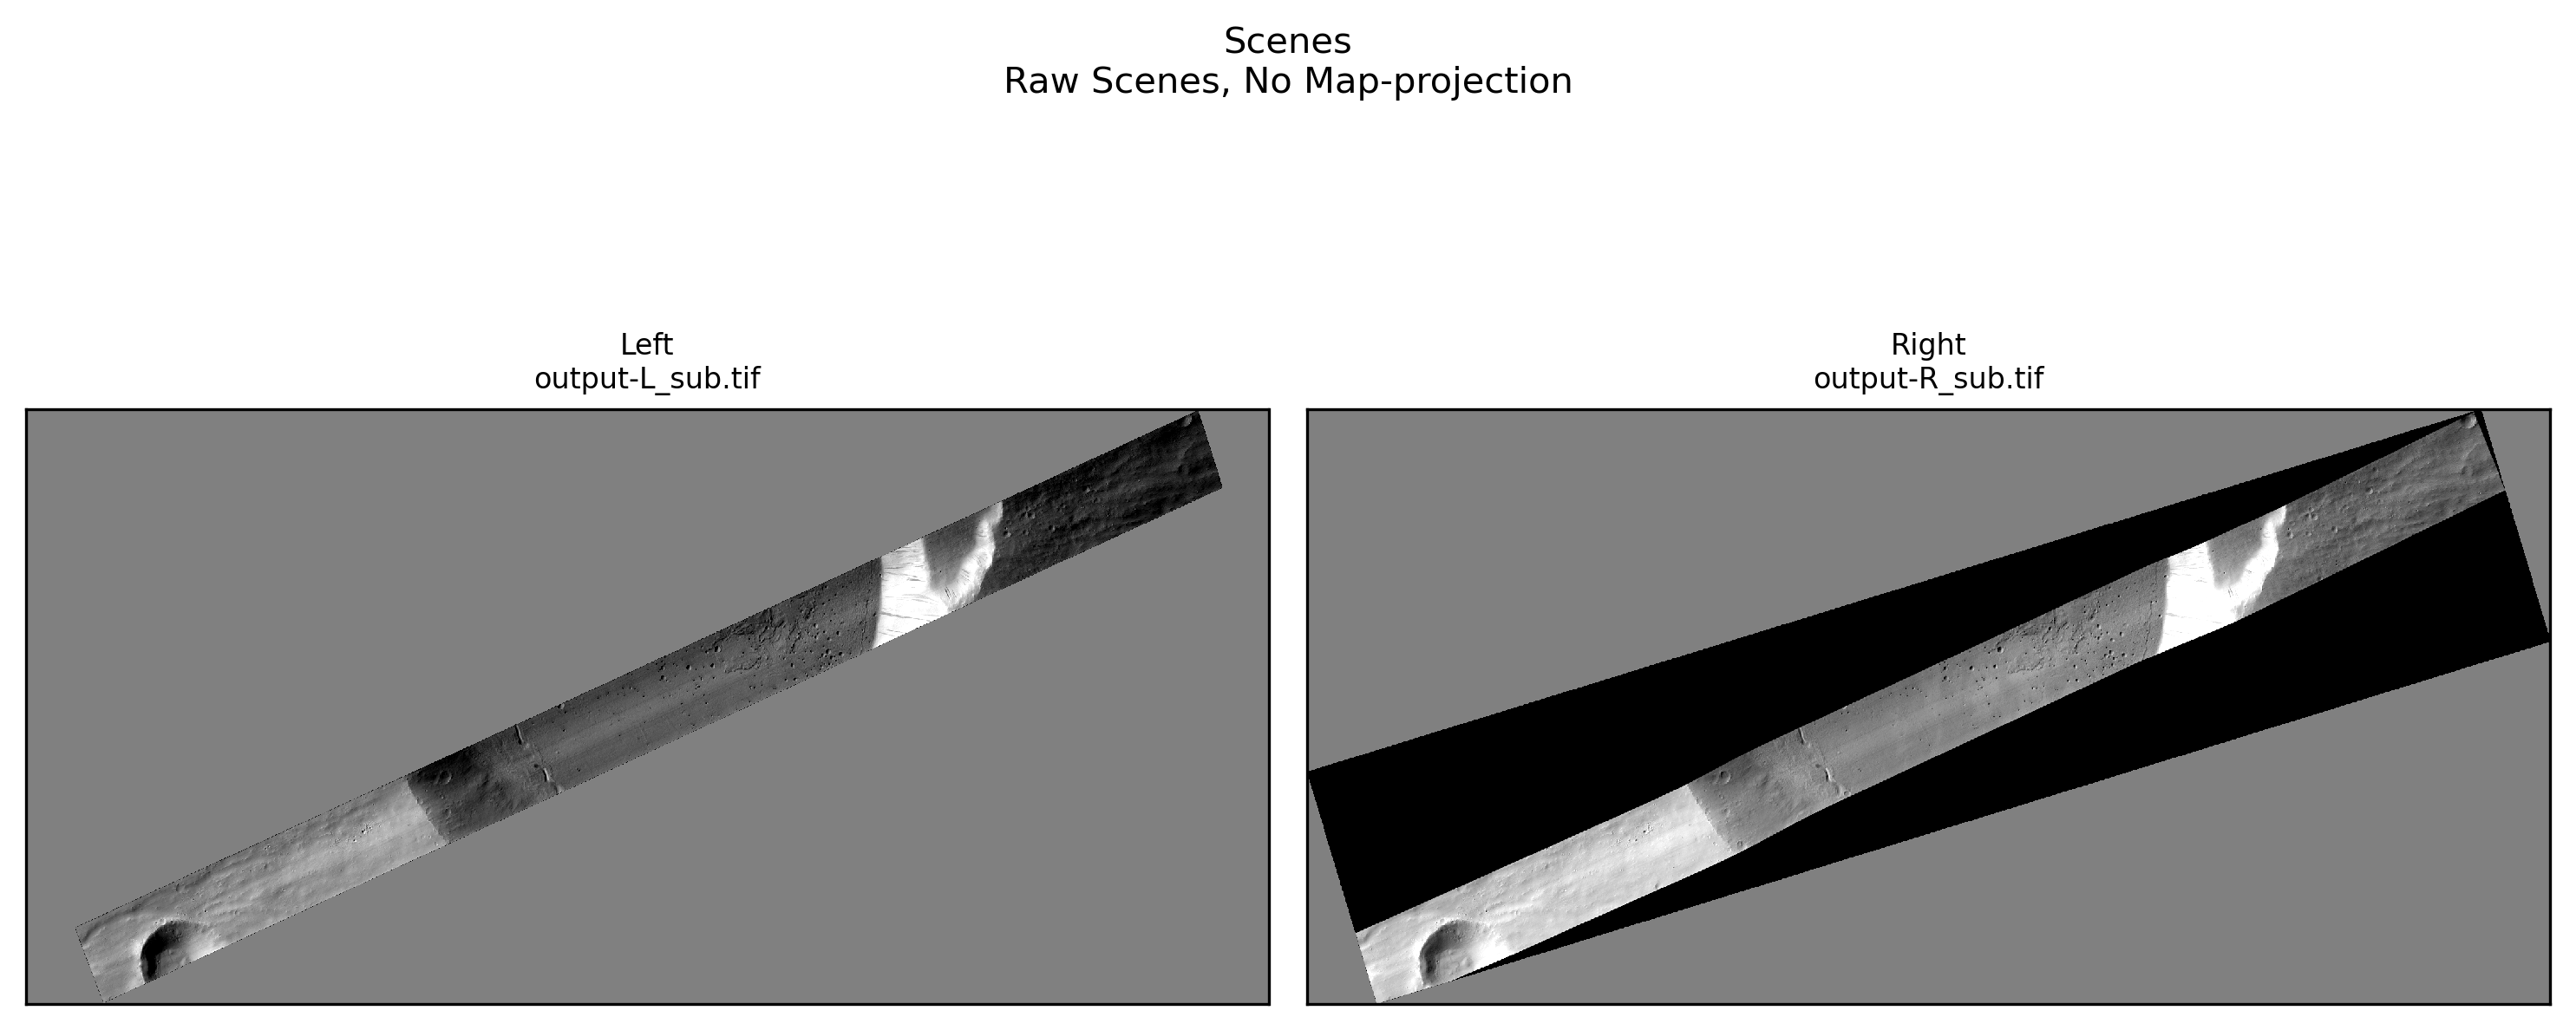

In [7]:
plotter = ScenePlotter(
  directory,
  stereo_directory,
  title="Scenes"
)

plotter.plot_scenes()

### Stereo Plots

In [8]:
from asp_plot.stereo import StereoPlotter

In [9]:
plotter = StereoPlotter(
  directory, 
  stereo_directory
)


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.





ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_4_mars_MOC_NA/result/output-DEM.tif



/Users/ben/miniforge3/envs/asp_plot/lib/python3.13/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


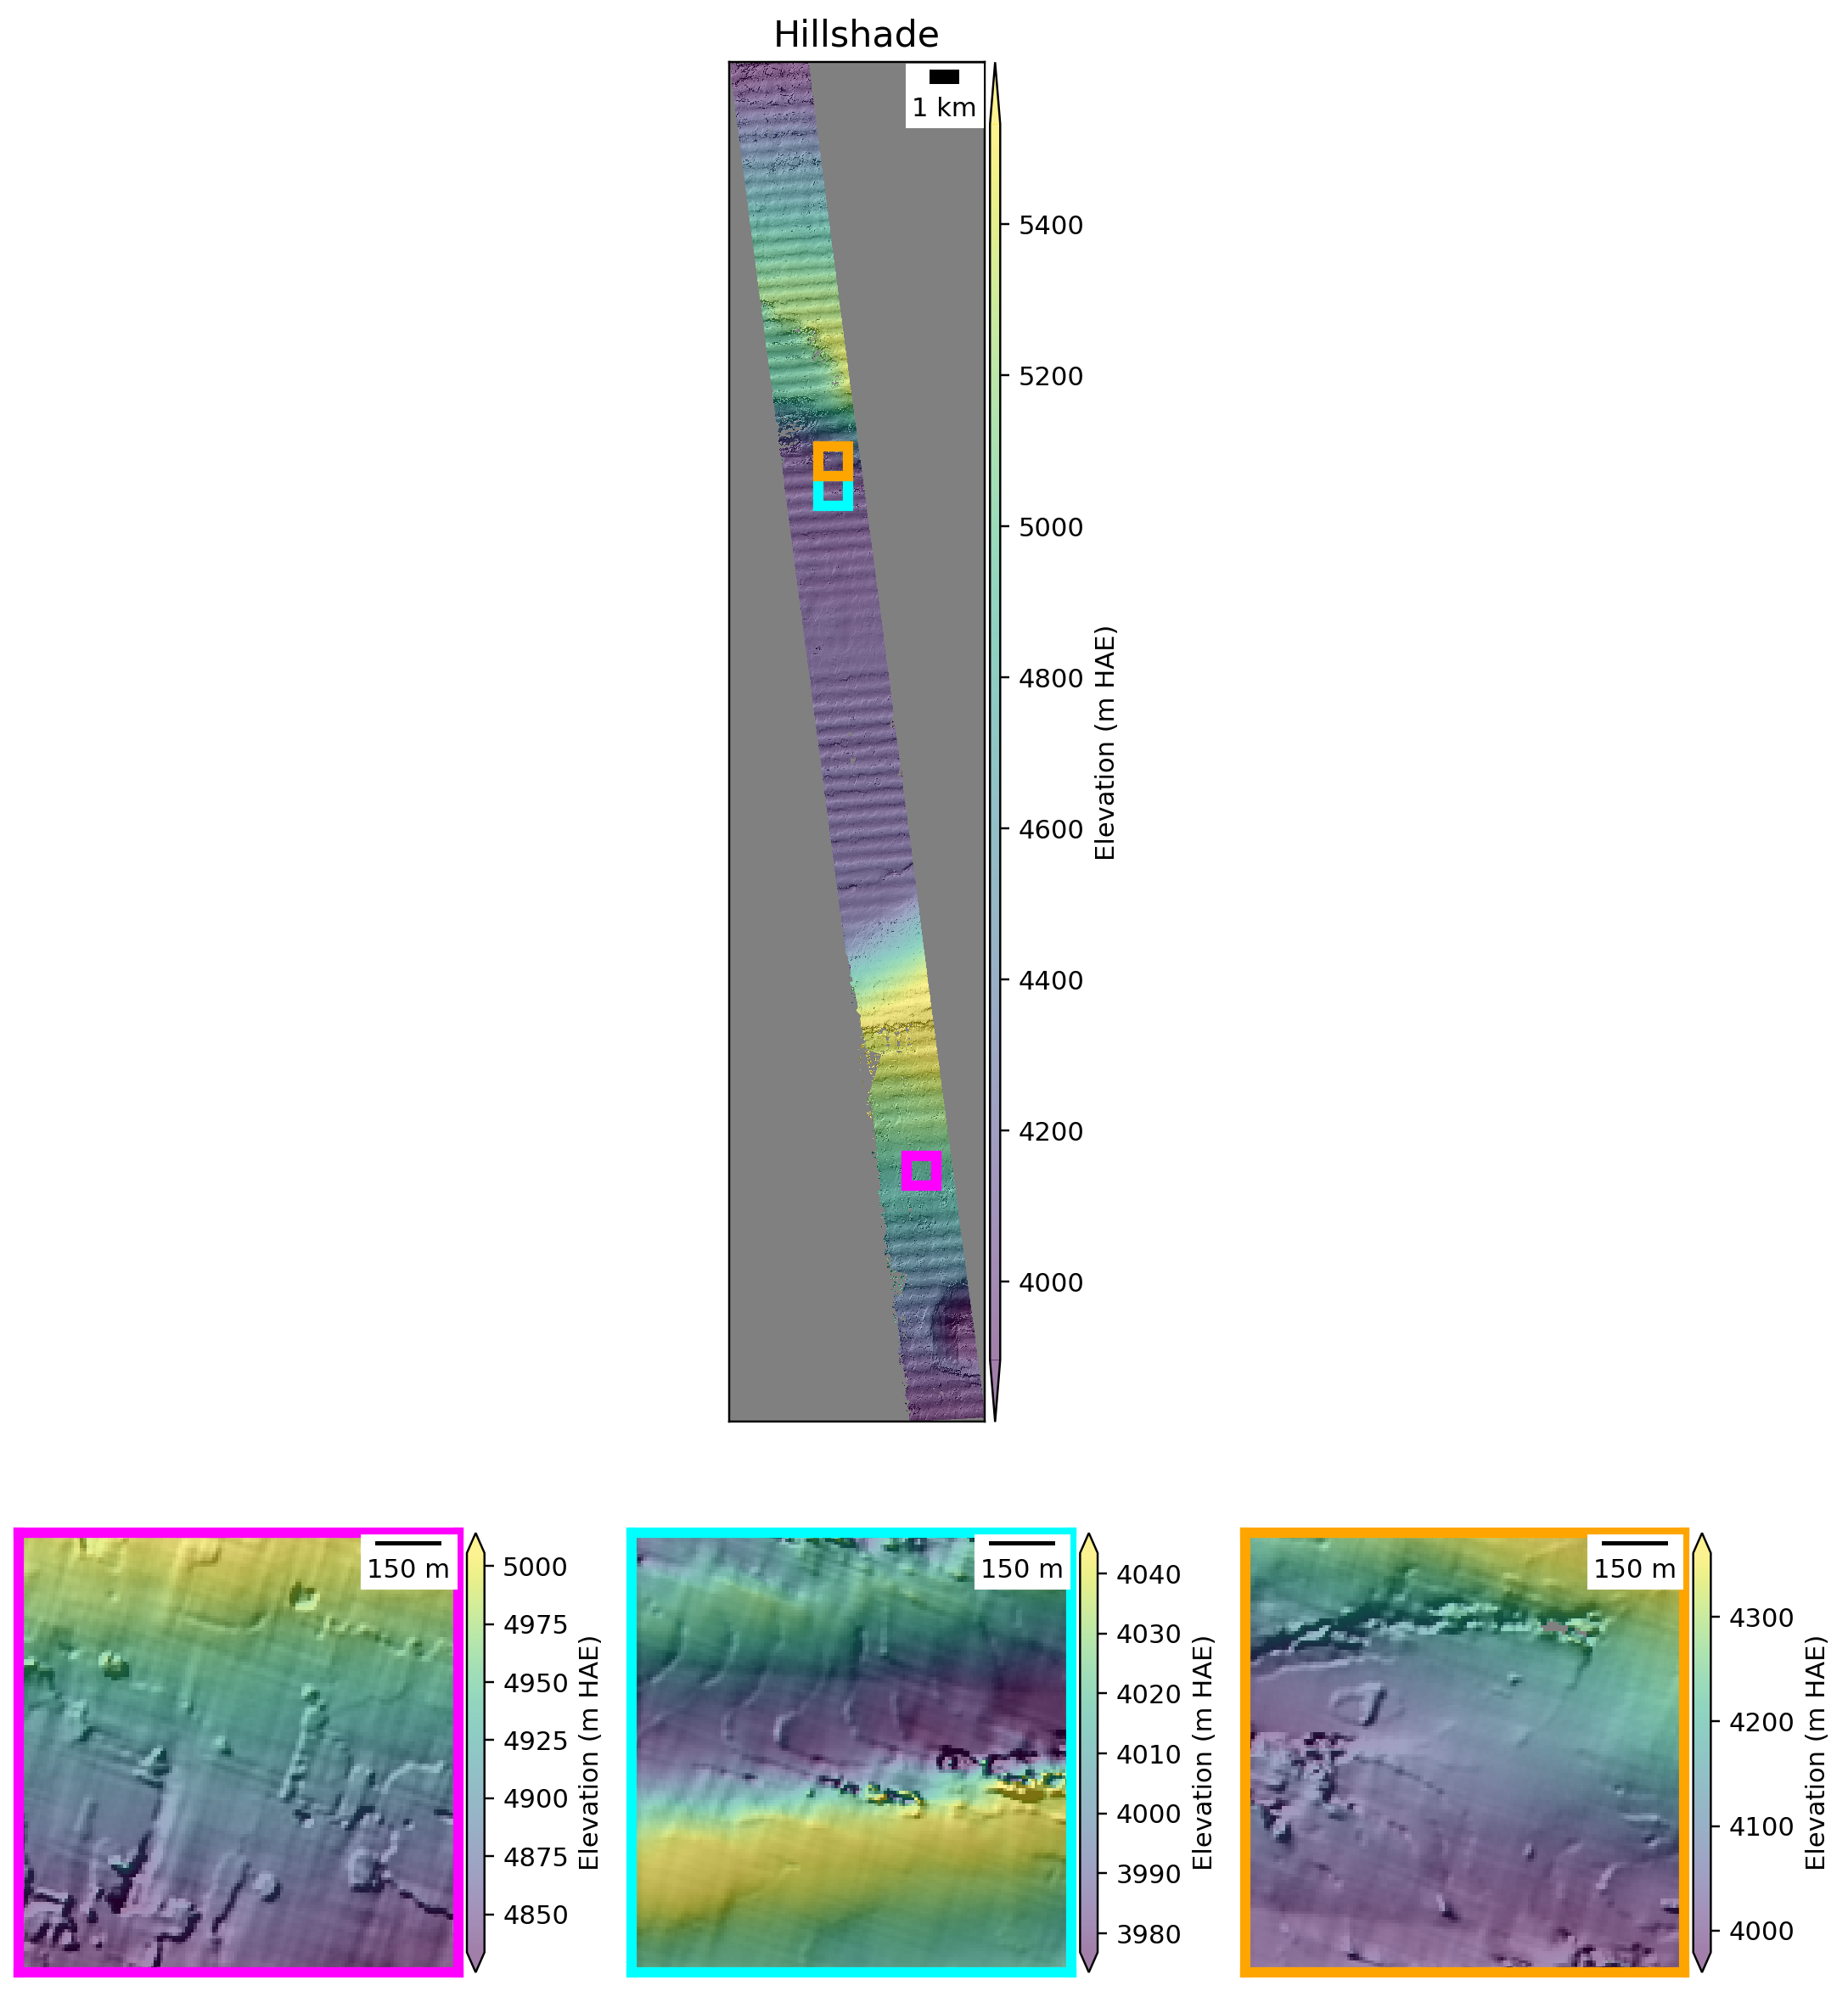

In [10]:
plotter.title = "Hillshade"

plotter.plot_detailed_hillshade()

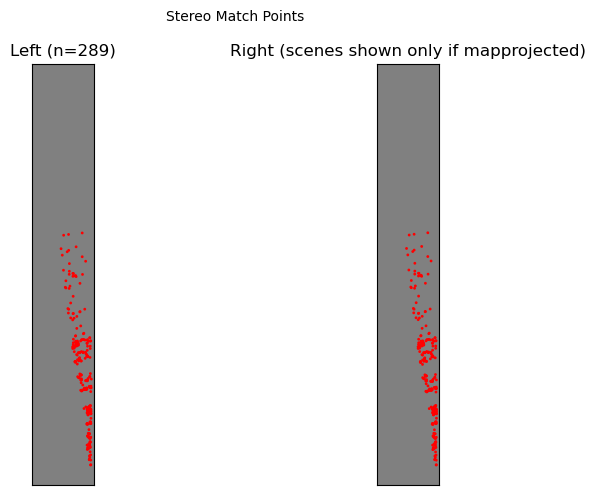

In [11]:
plotter.title="Stereo Match Points"

plotter.plot_match_points()

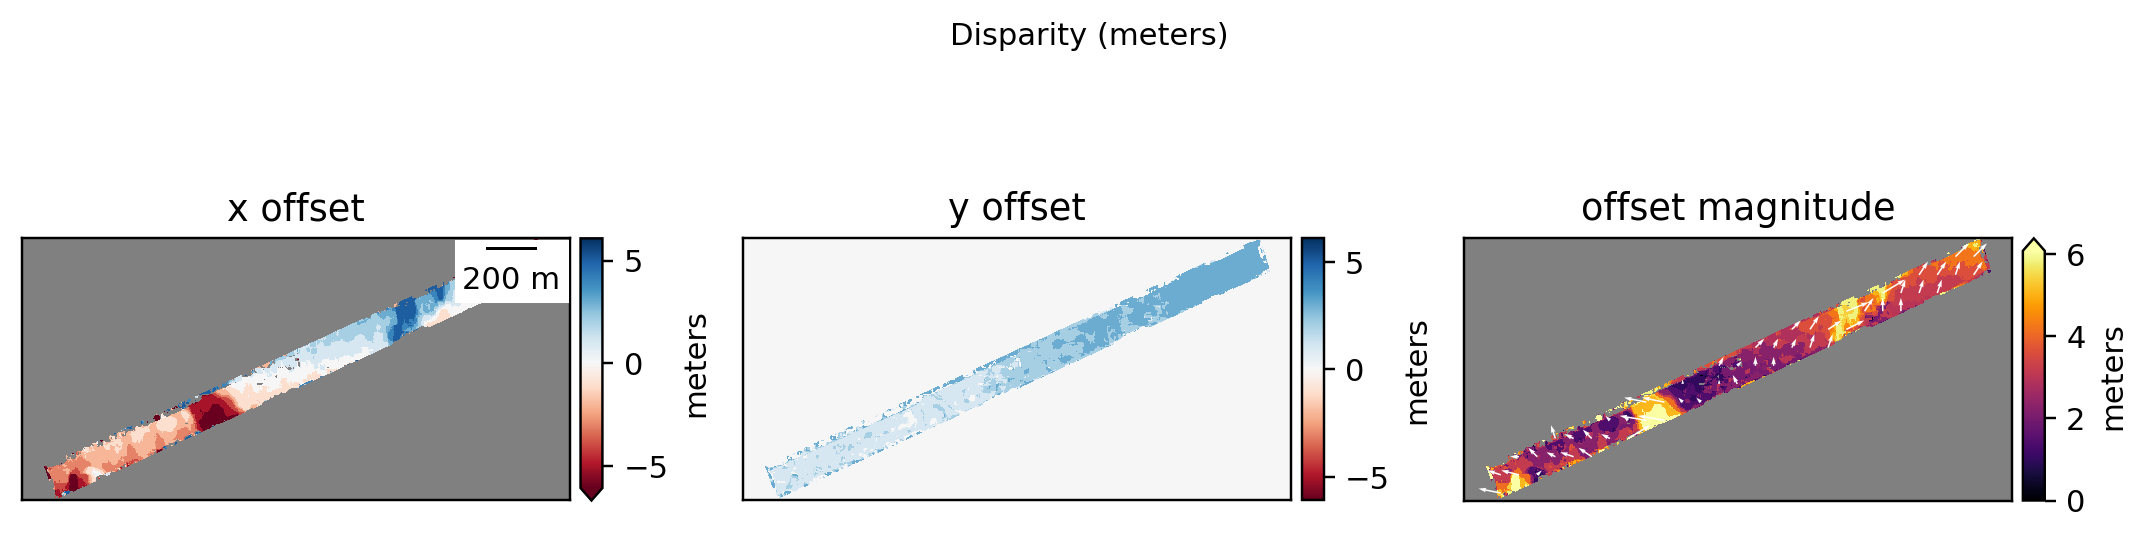

In [12]:
plotter.title = "Disparity (meters)"

plotter.plot_disparity(
  unit="meters",
  quiver=True,
)

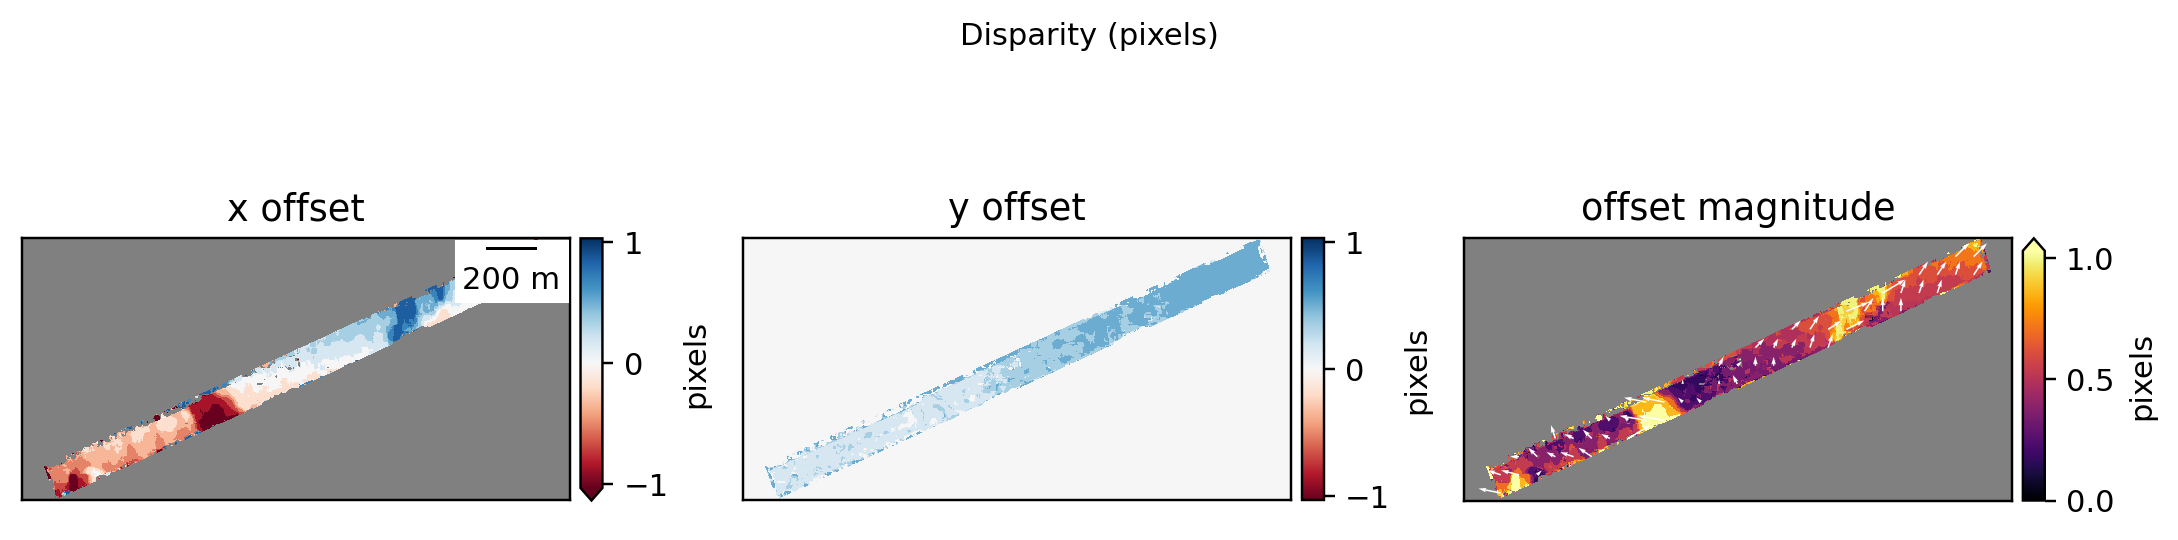

In [13]:
plotter.title = "Disparity (pixels)"

plotter.plot_disparity(
  unit="pixels",
  quiver=True,
)

Plotting DEM results. This can take a minute for large inputs.


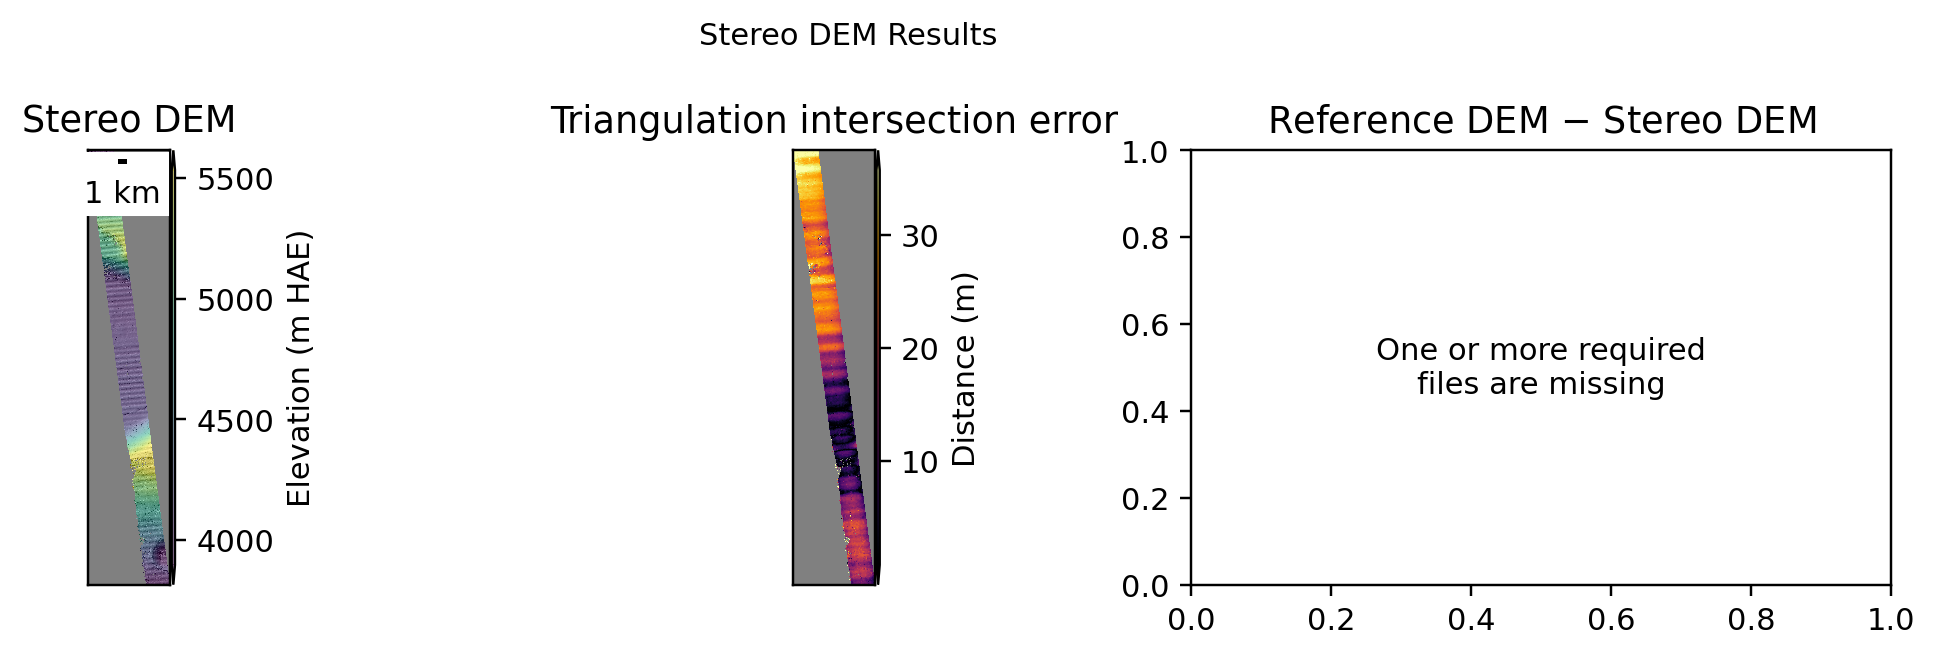

In [14]:
plotter.title = "Stereo DEM Results"

plotter.plot_dem_results()